In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cluster_analysis import C_HDBSCAN, C_GaussianMixture
from evaluation_metrics import ClusterEvalIoU

In [52]:
df = pd.read_hdf('../data/m12f_cluster_data_v2.h5', key='star')

In [53]:
df.sort_values('subhalo_infall_mass_stars', inplace=True, kind='stable')

In [54]:
df.head()

Unnamed: 0.2  Unnamed: 0  Unnamed: 0.1       feH  id_stars  \
392583        392583      392583        392583 -2.994283    914941   
393140        393140      393140        393140 -3.898082   1541577   
394033        394033      394033        394033 -2.463823   2475137   
394526        394526      394526        394526 -3.893432   3086235   
395016        395016      395016        395016 -3.900070   3607123   

        radial_distance_stars  redshift_stars  snap_list_stars    star_mass  \
392583              14.566939             3.0              120  5062.585413   
393140               4.855387             3.0              120  4970.694220   
394033               6.431155             3.0              120  4809.284822   
394526               7.008053             3.0              120  4791.247968   
395016               6.725730             3.0              120  5075.563850   

        subhalo_mass_stars  ...    apostar  peristar   eccstar   zmaxstar  \
392583           4925926.0  ...  15.764190  5.315948  0.495644  13.090939   
393140           4925926.0  ...   9.634551  0.470962  0.906791   8.297935   
394033           4925926.0  ...   7.607372  3.022387  0.431335   6.148267   
394526           4925926.0  ...   9.572306  2.716280  0.557918   3.241355   
395016           4925926.0  ...  10.535989  0.389245  0.928744   8.028155   

        thetarstar  thetazstar  thetaphistar  omegarstar  omegazstar  \
392583    2.060133    5.320961      3.395017   31.454214   22.729315   
393140    5.532618    4.758509      3.577694   65.277819   45.165677   
394033    4.552350    0.995950      2.138424   62.254784   48.303129   
394526    4.889314    0.469157      3.433979   54.979486   52.768515   
395016    5.008611    2.602832      0.205884   61.966810   39.666631   

        omegaphistar  
392583     22.080097  
393140    -34.199003  
394033     44.631887  
394526    -39.755465  
395016    -33.876855  

[5 rows x 57 columns]

In [55]:
prev_val = -1
prev_id = 0
df['cluster_id'] = 0
cluster_ids = np.zeros((len(df)), dtype=np.int32)
for i, (idx, row) in enumerate(df.iterrows()):
    if (row['subhalo_infall_mass_stars'] - prev_val)>0.1:
        prev_id+=1
        prev_val = row['subhalo_infall_mass_stars']
    cluster_ids[i] = prev_id
print(cluster_ids)
df['cluster_id'] = cluster_ids

[  1   1   1 ... 280 280 280]


In [57]:
from collections import Counter
Counter(cluster_ids).most_common()

[(136, 134330),
 (114, 122045),
 (269, 71731),
 (245, 27800),
 (253, 24561),
 (261, 21823),
 (188, 11893),
 (208, 11096),
 (212, 5615),
 (213, 4910),
 (277, 3176),
 (215, 2550),
 (198, 2346),
 (249, 2140),
 (271, 1563),
 (176, 1559),
 (250, 1222),
 (211, 1130),
 (115, 901),
 (270, 659),
 (92, 549),
 (192, 484),
 (195, 448),
 (187, 418),
 (280, 287),
 (156, 275),
 (159, 223),
 (165, 220),
 (183, 220),
 (75, 216),
 (239, 208),
 (262, 201),
 (203, 196),
 (182, 192),
 (197, 179),
 (191, 165),
 (232, 147),
 (128, 132),
 (240, 130),
 (255, 113),
 (144, 108),
 (231, 99),
 (268, 97),
 (279, 94),
 (209, 92),
 (201, 86),
 (190, 78),
 (222, 69),
 (206, 64),
 (83, 63),
 (80, 62),
 (86, 54),
 (278, 44),
 (56, 40),
 (142, 38),
 (172, 38),
 (105, 36),
 (151, 36),
 (12, 33),
 (247, 33),
 (132, 32),
 (185, 30),
 (152, 28),
 (251, 27),
 (98, 26),
 (224, 26),
 (275, 26),
 (163, 25),
 (88, 24),
 (121, 24),
 (153, 24),
 (155, 23),
 (106, 22),
 (16, 20),
 (74, 20),
 (276, 20),
 (51, 18),
 (171, 18),
 (175, 

In [58]:
print(len(df))

460601


In [108]:
large_clusters = [107, 164, 149, 160]
print([df.loc[df['cluster_id'] == cluster]['subhalo_mass_stars'].to_numpy()[0] for cluster in large_clusters])
print([df.loc[df['cluster_id'] == cluster]['redshift_stars'].to_numpy()[0] for cluster in large_clusters])

[2405982720.0, 51965812736.0, 17008546816.0, 33575497728.0]
[2.0, 1.5, 3.0, 2.5056181]


In [78]:
small_progenitors = [cluster for cluster in range(1, 166) if cluster not in large_clusters and df.loc[df['cluster_id'] == cluster]['subhalo_mass_stars'].to_numpy()[0]<1e9]

In [79]:
print(small_progenitors)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 87, 89, 90, 92, 93, 94, 98, 99, 100, 103, 105, 111, 112, 121, 122, 124, 125, 128, 133, 135, 142, 153, 163]


In [80]:
remnants = [cluster for cluster in range(1,166) if cluster not in large_clusters and cluster not in small_progenitors]

In [81]:
old_clusters = [cluster for cluster in remnants if df.loc[df['cluster_id']==cluster]['redshift_stars'].to_numpy()[0] > 3]
print(len(remnants), len(old_clusters))

59 21


In [82]:
remnants2 = [cluster for cluster in range(1,166) if cluster not in large_clusters and cluster not in small_progenitors and cluster not in old_clusters]

In [83]:
len(df.loc[np.isin(df['cluster_id'], remnants2)])

17034

In [84]:
len(df.loc[np.isin(df['cluster_id'], old_clusters)])

5397

In [85]:
len(df.loc[np.isin(df['cluster_id'], small_progenitors)])

16744

In [86]:
df['class'] = 0
df.loc[np.isin(df['cluster_id'], small_progenitors),'class']=1
df.loc[np.isin(df['cluster_id'], old_clusters),'class']=2
df.loc[df['cluster_id']==107,'class']=3
df.loc[df['cluster_id']==164,'class']=4
df.loc[df['cluster_id']==149,'class']=5
df.loc[df['cluster_id']==160,'class']=6

In [57]:
df.to_hdf('../data/m12i_cluster_data_crude_class_v2.h5', key='star')

In [87]:
df = pd.read_hdf('../data/m12i_cluster_data_crude_class_v2.h5', key='star')

In [88]:
df['lstar'] = np.linalg.norm([df['lzstar'].to_numpy(),df['lystar'].to_numpy(),df['lxstar'].to_numpy()],axis=0)
df['c_lzstar'] = df['lzstar'].to_numpy()*np.abs(df['estar'].to_numpy())**2.3
df['c_lystar'] = df['lystar'].to_numpy()*np.abs(df['estar'].to_numpy())**2.3
df['c_lxstar'] = df['lxstar'].to_numpy()*np.abs(df['estar'].to_numpy())**2.3
df['s_jzrstar'] = df['jzstar'].to_numpy() - df['jrstar'].to_numpy() # mostly spherical because you can try squaring it
df['a_jzrstar'] = df['jzstar'].to_numpy() + df['jrstar'].to_numpy() # mostly spherical because you can try squaring it
df['rstar'] = np.linalg.norm([df['xstar'].to_numpy(),df['ystar'].to_numpy(),df['zstar'].to_numpy()],axis=0)

<AxesSubplot:xlabel='feH', ylabel='mgfe'>

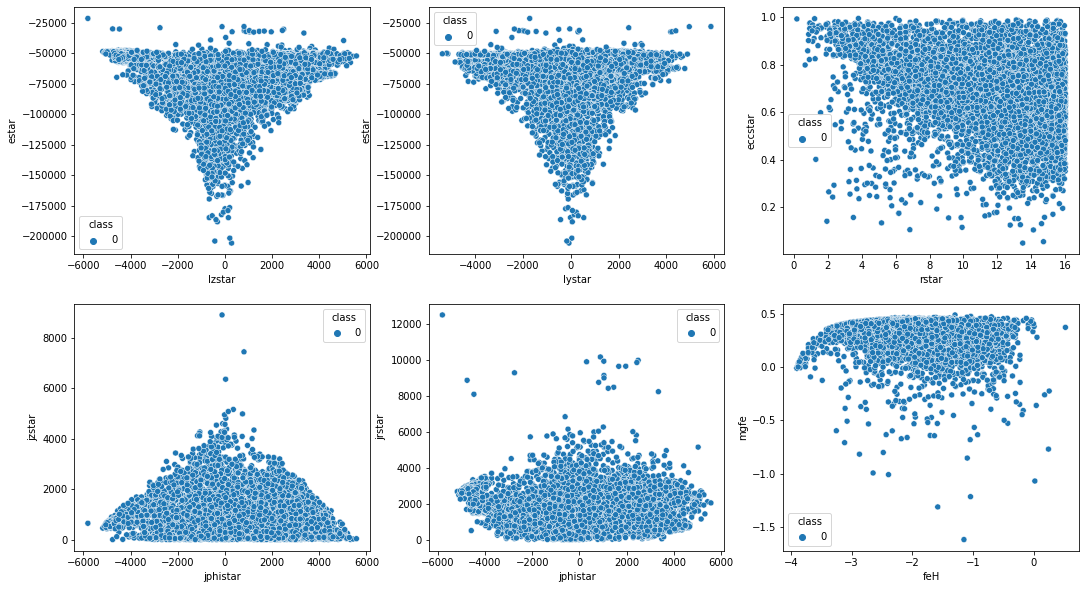

In [89]:
df_trim = df.loc[df['class']==0].copy()
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.scatterplot(data=df_trim, ax=axes[0,0], x='lzstar', y='estar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[0,1], x='lystar', y='estar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[0,2], x='rstar', y='eccstar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[1,0], x='jphistar', y='jzstar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[1,1], x='jphistar', y='jrstar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[1,2], x='feH', y='mgfe', hue='class')

<AxesSubplot:xlabel='feH', ylabel='mgfe'>

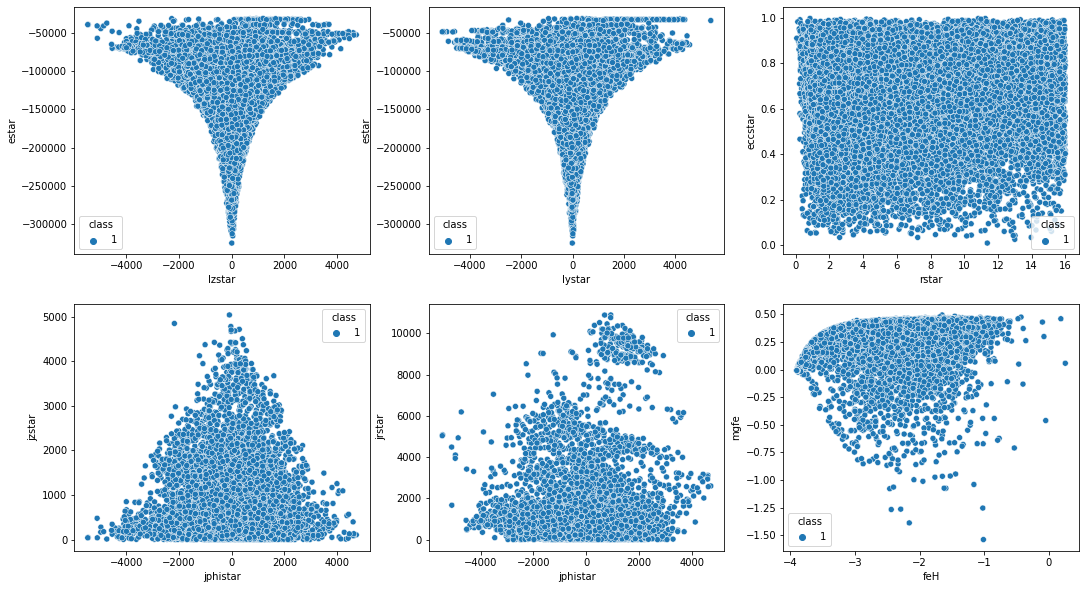

In [90]:
df_trim = df.loc[df['class']==1].copy()
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.scatterplot(data=df_trim, ax=axes[0,0], x='lzstar', y='estar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[0,1], x='lystar', y='estar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[0,2], x='rstar', y='eccstar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[1,0], x='jphistar', y='jzstar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[1,1], x='jphistar', y='jrstar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[1,2], x='feH', y='mgfe', hue='class')

<AxesSubplot:xlabel='feH', ylabel='mgfe'>

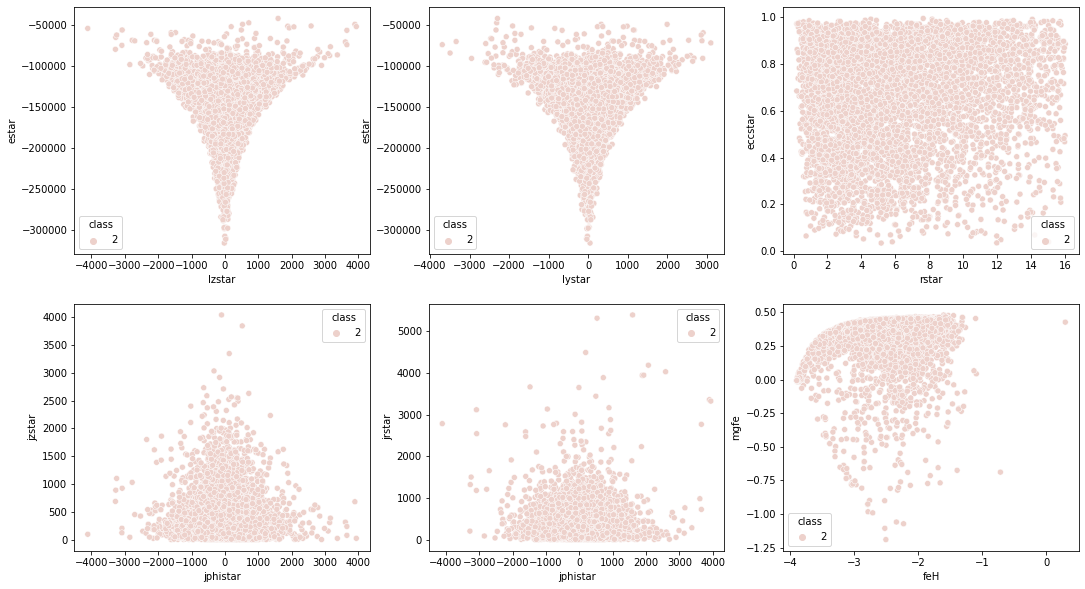

In [91]:
df_trim = df.loc[df['class']==2].copy()
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.scatterplot(data=df_trim, ax=axes[0,0], x='lzstar', y='estar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[0,1], x='lystar', y='estar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[0,2], x='rstar', y='eccstar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[1,0], x='jphistar', y='jzstar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[1,1], x='jphistar', y='jrstar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[1,2], x='feH', y='mgfe', hue='class')

<AxesSubplot:xlabel='feH', ylabel='mgfe'>

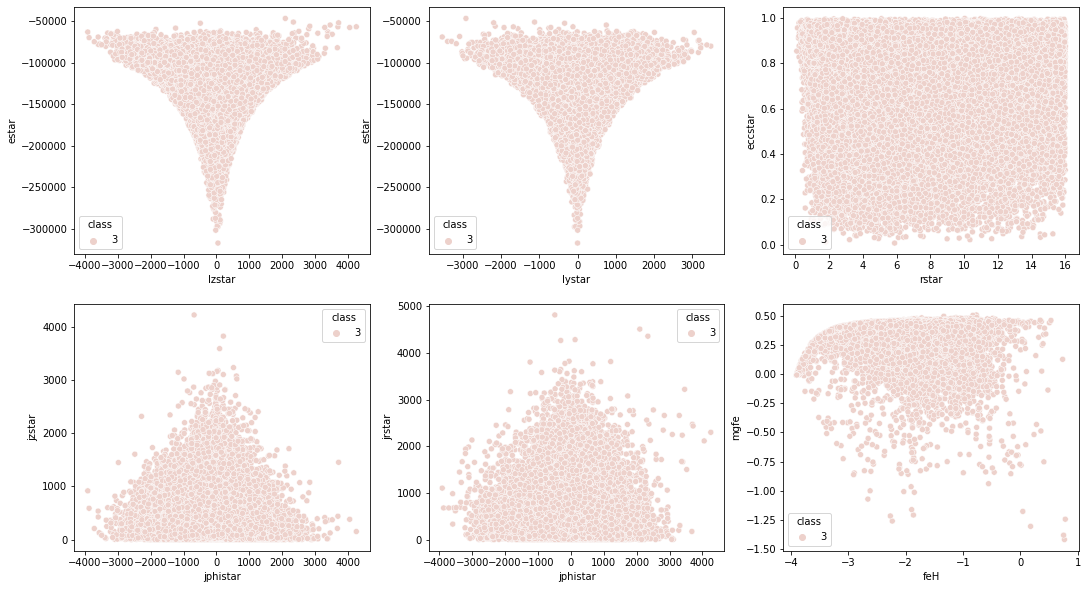

In [100]:
df_trim = df.loc[df['class']==3].copy()
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.scatterplot(data=df_trim, ax=axes[0,0], x='lzstar', y='estar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[0,1], x='lystar', y='estar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[0,2], x='rstar', y='eccstar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[1,0], x='jphistar', y='jzstar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[1,1], x='jphistar', y='jrstar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[1,2], x='feH', y='mgfe', hue='class')

<AxesSubplot:xlabel='feH', ylabel='mgfe'>

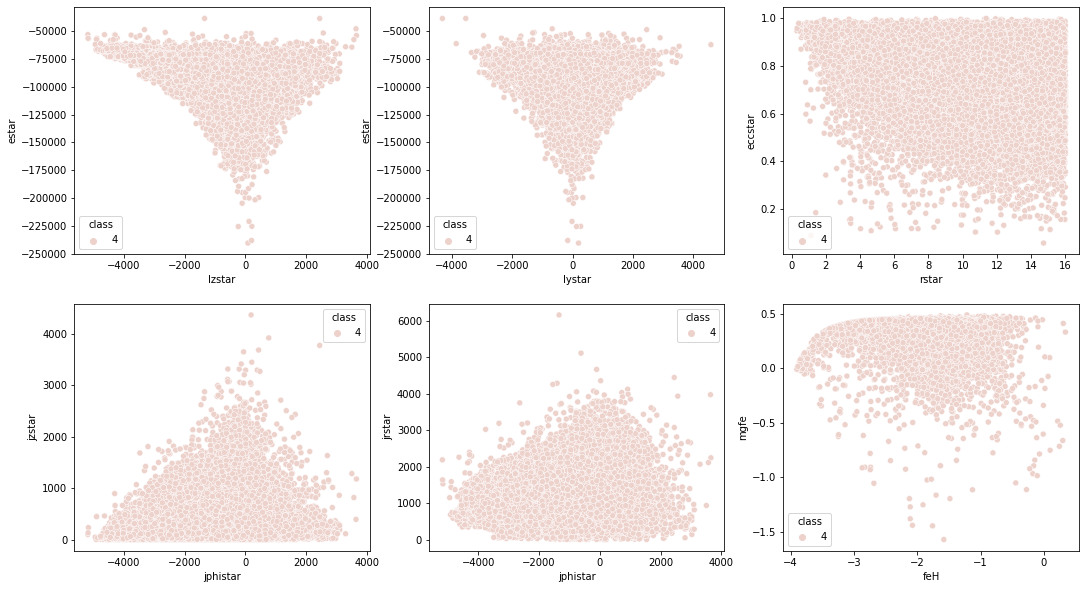

In [101]:
df_trim = df.loc[df['class']==4].copy()
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.scatterplot(data=df_trim, ax=axes[0,0], x='lzstar', y='estar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[0,1], x='lystar', y='estar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[0,2], x='rstar', y='eccstar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[1,0], x='jphistar', y='jzstar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[1,1], x='jphistar', y='jrstar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[1,2], x='feH', y='mgfe', hue='class')

<AxesSubplot:xlabel='feH', ylabel='mgfe'>

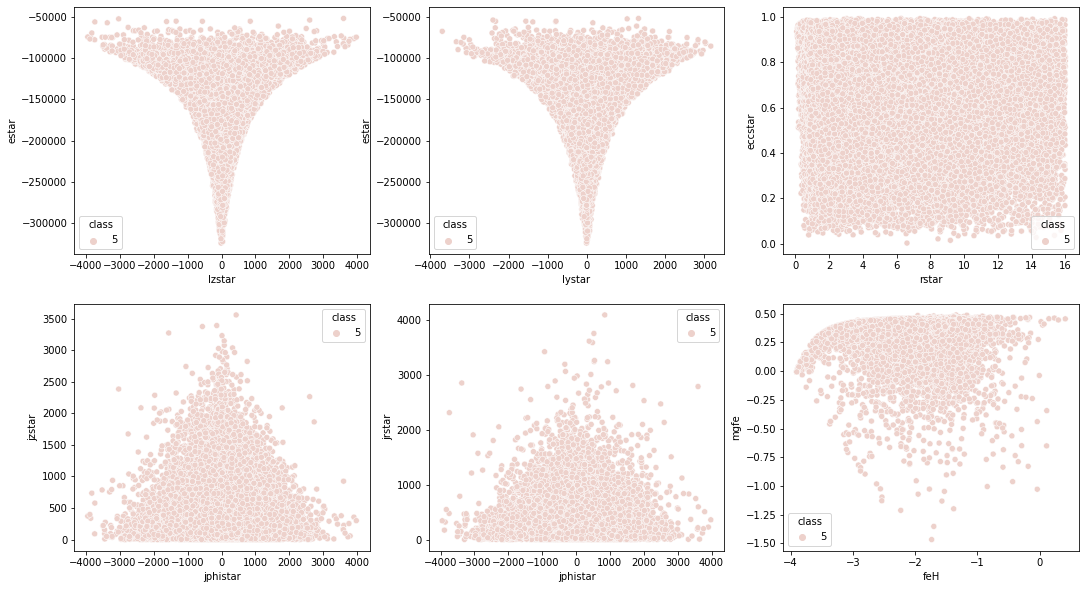

In [94]:
df_trim = df.loc[df['class']==5].copy()
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.scatterplot(data=df_trim, ax=axes[0,0], x='lzstar', y='estar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[0,1], x='lystar', y='estar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[0,2], x='rstar', y='eccstar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[1,0], x='jphistar', y='jzstar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[1,1], x='jphistar', y='jrstar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[1,2], x='feH', y='mgfe', hue='class')

<AxesSubplot:xlabel='feH', ylabel='mgfe'>

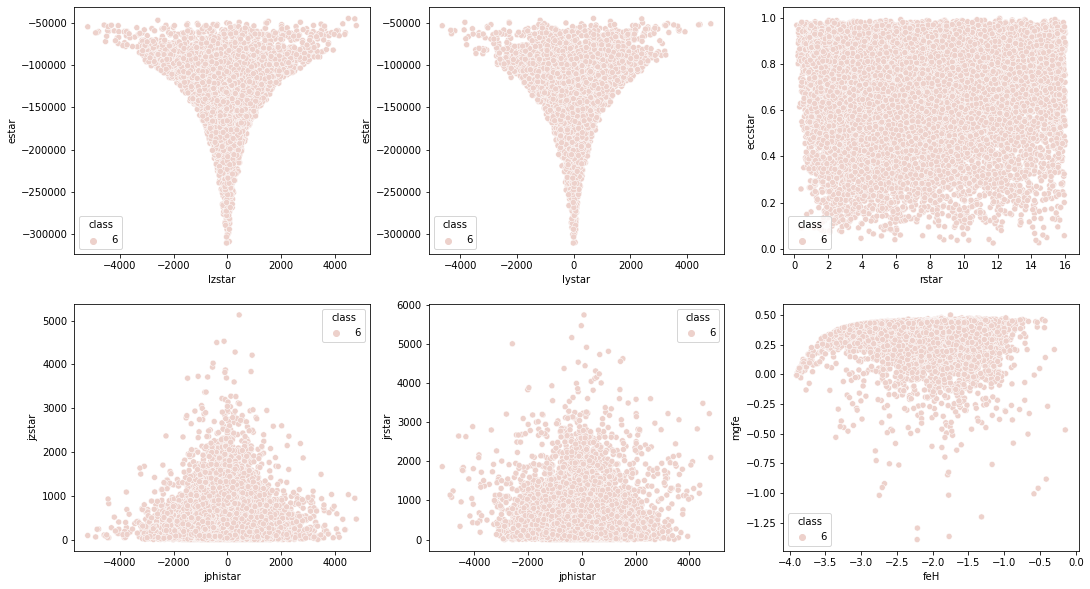

In [95]:
df_trim = df.loc[df['class']==6].copy()
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.scatterplot(data=df_trim, ax=axes[0,0], x='lzstar', y='estar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[0,1], x='lystar', y='estar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[0,2], x='rstar', y='eccstar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[1,0], x='jphistar', y='jzstar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[1,1], x='jphistar', y='jrstar', hue='class')
sns.scatterplot(data=df_trim, ax=axes[1,2], x='feH', y='mgfe', hue='class')

<AxesSubplot:xlabel='lzstar', ylabel='estar'>

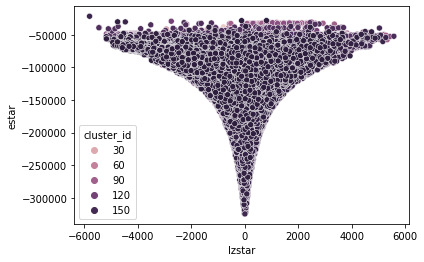

In [8]:
sns.scatterplot(data=df, x='lzstar', y='estar', hue='cluster_id')

In [9]:
df_small = df.loc[df['subhalo_mass_stars']>=1e9].copy()

<AxesSubplot:xlabel='lzstar', ylabel='estar'>

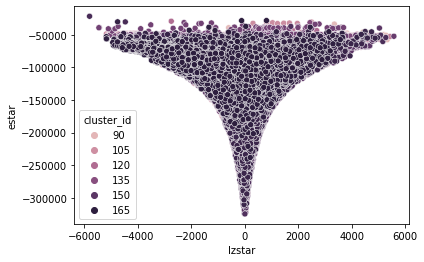

In [11]:
sns.scatterplot(data=df_small, x='lzstar', y='estar', hue='cluster_id')

In [59]:
sun = [0,8,0]
df['sundist'] = np.linalg.norm([df['xstar']-sun[0],df['ystar']-sun[1],df['zstar']-sun[2]], axis=0)
df_sun_large = df.loc[df['sundist']<50].copy()

<AxesSubplot:xlabel='sundist', ylabel='Count'>

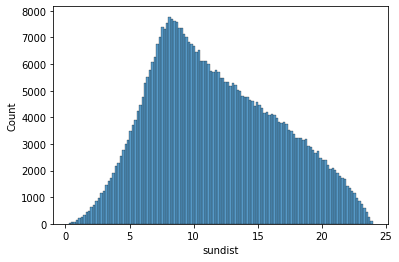

In [60]:
sns.histplot(df['sundist'])

<AxesSubplot:xlabel='lzstar', ylabel='estar'>

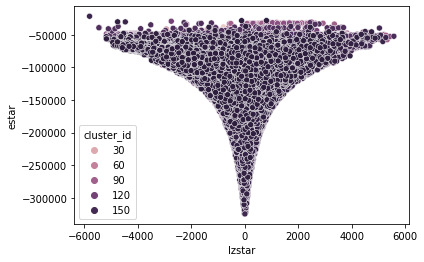

In [22]:
sns.scatterplot(data=df_sun_large, x='lzstar', y='estar', hue='cluster_id')

In [61]:
df_sun_small = df.loc[df['sundist']<5].copy()
print(len(df_sun_small))

30459


<AxesSubplot:xlabel='lzstar', ylabel='estar'>

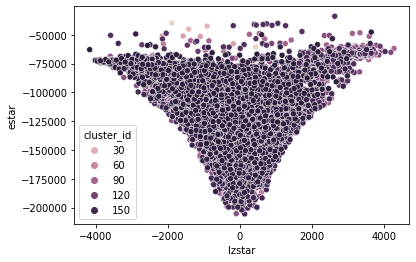

In [24]:
sns.scatterplot(data=df_sun_small, x='lzstar', y='estar', hue='cluster_id')

In [5]:
print(len(df_small))

168294


In [7]:
df_small.columns

Index(['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'feH', 'id_stars',
       'radial_distance_stars', 'redshift_stars', 'snap_list_stars',
       'star_mass', 'subhalo_mass_stars', 'subhalo_stellar_mass_stars',
       'vphistar', 'vrstar', 'vthetastar', 'vxstar', 'vystar', 'vzstar',
       'xstar', 'ystar', 'zstar', 'subhalo_infall_mass_stars',
       'subhalo_infall_stellar_mass_stars', 'form_scalefactor', 'form_time',
       'vr_cyl', 'vphi_cyl', 'vz_cyl', 'r_cyl', 'phi_cyl', 'z_cyl', 'vx_cart',
       'vy_cart', 'vz_cart', 'x_cart', 'y_cart', 'z_cart', 'cluster_id',
       'mgfe', 'jrstar', 'jzstar', 'jphistar', 'estar', 'pstar', 'kstar',
       'lxstar', 'lystar', 'lzstar', 'apostar', 'peristar', 'eccstar',
       'zmaxstar'],
      dtype='object')

In [8]:
df_small.sort_values('subhalo_infall_mass_stars', inplace=True, kind='stable')

In [9]:
prev_val = -1
prev_id = 0
df_small['cluster_id'] = 0
cluster_ids = np.zeros((len(df_small)), dtype=np.int32)
for i, (idx, row) in enumerate(df_small.iterrows()):
    if (row['subhalo_infall_mass_stars'] - prev_val)>0.1:
        prev_id+=1
        prev_val = row['subhalo_infall_mass_stars']
    cluster_ids[i] = prev_id
print(cluster_ids)
df_small['cluster_id'] = cluster_ids

[ 1  1  1 ... 76 76 76]


In [10]:
df_small.head()

Unnamed: 0.2  Unnamed: 0  Unnamed: 0.1       feH  id_stars  \
56892          56892       56892         56892 -3.756637   1355050   
76834          76834       76834         76834 -2.595785   6552585   
91908          91908       91908         91908 -3.872660  10114532   
125564        125564      125564        125564 -2.742247    177687   
128304        128304      128304        128304 -2.614258   1420290   

        radial_distance_stars  redshift_stars  snap_list_stars    star_mass  \
56892               14.041376             2.0              172  4470.951498   
76834               15.795071             2.0              172  4848.241188   
91908                4.850723             2.0              172  5234.642425   
125564               6.634918             3.0              120  4499.582928   
128304              10.272408             3.0              120  4749.431617   

        subhalo_mass_stars  ...          estar          pstar         kstar  \
56892         1.008120e+09  ...  -78918.298939 -115558.759562  36640.460623   
76834         1.008120e+09  ...  -58202.029608 -114147.017321  55944.987714   
91908         1.008120e+09  ...  -84163.983727 -183670.906461  99506.922734   
125564        1.104274e+09  ... -158186.895706 -162822.056019   4635.160313   
128304        1.104274e+09  ... -122200.864992 -137446.615853  15245.750861   

             lxstar       lystar       lzstar    apostar  peristar   eccstar  \
56892    283.043700 -1496.308276   -60.588869  32.443207  2.423908  0.860963   
76834    767.903784 -2207.505188  -986.889779  60.060726  3.599513  0.886915   
91908    759.501802   111.505381   465.913105  30.365747  0.991062  0.936788   
125564   186.409008    81.272008    13.182070   7.124517  0.371895  0.900780   
128304  1271.461175   244.723402 -1145.611994  10.745133  4.161676  0.441641   

         zmaxstar  
56892   26.806763  
76834   28.795151  
91908    9.757058  
125564   3.177483  
128304   6.575896  

[5 rows x 51 columns]

[70 15 38 10 45]


<AxesSubplot:xlabel='feH', ylabel='mgfe'>

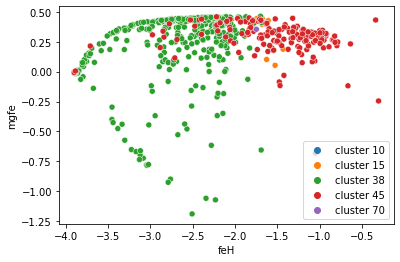

In [12]:
chosen_cluster_ids = np.random.choice(np.arange(1, 77), 5)
print(chosen_cluster_ids)
chosen_ids = np.argwhere(df_small['cluster_id'].isin(chosen_cluster_ids).to_numpy())[:,0]
hues = np.array([f'cluster {id}' for id in df_small['cluster_id'].to_numpy()])[chosen_ids]
sns.scatterplot(data=df_small.iloc[chosen_ids], x='feH', y='mgfe', hue=hues)

In [28]:
df_small.loc[df_small['cluster_id']==19]

Unnamed: 0       feH  id_stars  radial_distance_stars  redshift_stars  \
29817       29817 -3.625264   6749974               8.519153        3.324324   

       snap_list_stars    star_mass  subhalo_mass_stars  subhalo_peak_mass  \
29817              108  4527.344299        3.426781e+09       3.427351e+09   

       subhalo_stellar_mass_stars  ...      vrstar  vthetastar      vxstar  \
29817                  1488385.25  ... -102.555305  -175.52771 -222.167953   

           vystar     vzstar     xstar     ystar     zstar  cluster_id  \
29817  101.606224  30.203451  2.735775 -4.589271  6.635518          19   

          mgfe  
29817  0.07311  

[1 rows x 21 columns]

In [62]:
np.max(df['cluster_id'])

280

In [63]:
df_small = df
remove_cluster = []
cutoff = 100
for id in range(1, 281):
    if len(df_small.loc[df_small['cluster_id']==id]) < cutoff:
        remove_cluster.append(id)

print(remove_cluster)

df_small_small = df_small.loc[~df_small['cluster_id'].isin(remove_cluster)].copy()
print(280 - len(remove_cluster))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157, 158, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 184, 185, 186, 189, 190, 193, 194, 196, 199, 200, 201, 202, 204, 205, 206, 207, 209, 210, 214, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 237, 238, 241, 242, 243, 244, 246, 247, 248, 251, 252, 254, 

In [64]:
print(len(df_small_small))
df_small_small.head()

458161


Unnamed: 0.2  Unnamed: 0  Unnamed: 0.1       feH  id_stars  \
404950        404950      404950        404950 -1.946947     83716   
404980        404980      404980        404980 -2.316902    126355   
405118        405118      405118        405118 -2.992221    241692   
405263        405263      405263        405263 -1.830220    378404   
405265        405265      405265        405265 -2.283537    378528   

        radial_distance_stars  redshift_stars  snap_list_stars    star_mass  \
404950               2.483367             4.0               88  4948.563749   
404980               3.318894             4.0               88  4672.849281   
405118               3.889670             4.0               88  5035.605437   
405263               5.164272             4.0               88  4770.360036   
405265               4.342873             4.0               88  5159.877944   

        subhalo_mass_stars  ...  peristar   eccstar   zmaxstar  thetarstar  \
404950         116723648.0  ...  0.832782  0.844419   4.833440    5.961821   
404980         116723648.0  ...  2.652359  0.309447   1.862229    5.475435   
405118         116723648.0  ...  2.111210  0.759238   7.149960    0.297149   
405263         116723648.0  ...  1.997858  0.845937  17.052973    6.181744   
405265         116723648.0  ...  2.492223  0.708230  10.056795    0.125934   

        thetazstar  thetaphistar  omegarstar  omegazstar  omegaphistar  \
404950    0.376258      2.182433   62.519833   55.192845    -38.968237   
404980    5.304519      0.800285   94.894772   89.759276     66.940992   
405118    2.806575      4.641896   38.041936   42.792817     25.971150   
405263    1.749188      4.978019   23.444569   19.026523    -13.246247   
405265    1.051083      6.228799   38.029568   31.232025    -23.279509   

          sundist  
404950   8.986709  
404980   7.413753  
405118  10.665400  
405263  10.324047  
405265   9.726534  

[5 rows x 58 columns]

In [65]:
prev_val = -1
prev_id = 0
df_small_small['cluster_id'] = 0
cluster_ids = np.zeros((len(df_small_small)), dtype=np.int32)
for i, (idx, row) in enumerate(df_small_small.iterrows()):
    if (row['subhalo_infall_mass_stars'] - prev_val)>0.1:
        prev_id+=1
        prev_val = row['subhalo_infall_mass_stars']
    cluster_ids[i] = prev_id
print(cluster_ids)
df_small_small['cluster_id'] = cluster_ids

[ 1  1  1 ... 41 41 41]


In [66]:
df_small_small.tail()

Unnamed: 0.2  Unnamed: 0  Unnamed: 0.1       feH  id_stars  \
163521        163521      163521        163521 -1.312468  15533771   
163522        163522      163522        163522 -1.582086  15533875   
163529        163529      163529        163529 -1.464472  15541672   
163535        163535      163535        163535 -1.221183  15687922   
163536        163536      163536        163536 -2.602264  15750358   

        radial_distance_stars  redshift_stars  snap_list_stars    star_mass  \
163521              14.899133        0.398664              412  5621.934371   
163522              15.398386        0.398664              412  5235.942050   
163529              14.447767        0.398664              412  5016.662084   
163535              15.721414        0.398664              412  4264.237004   
163536               1.540668        0.398664              412  4699.407789   

        subhalo_mass_stars  ...   peristar   eccstar   zmaxstar  thetarstar  \
163521        1.494302e+11  ...   9.226377  0.758022  21.138868    6.063819   
163522        1.494302e+11  ...   9.364196  0.720109  23.638451    6.001856   
163529        1.494302e+11  ...  13.270240  0.571906  11.173463    6.104903   
163535        1.494302e+11  ...  15.381745  0.444467   6.648279    6.146207   
163536        1.494302e+11  ...   1.540668  0.953876  24.049067    0.010545   

        thetazstar  thetaphistar  omegarstar  omegazstar  omegaphistar  \
163521    6.247530      3.217710    7.193317    5.846033      4.923537   
163522    6.120862      3.409703    8.476968    6.868353      5.841974   
163529    4.535943      2.820864    9.561780    8.821790      6.954335   
163535    4.887393      2.452384   11.102056   10.629238      8.226054   
163536    2.333329      3.309003    7.997331   18.768321     -4.826471   

          sundist  
163521  11.844872  
163522  13.515115  
163529  11.030627  
163535  11.019295  
163536   7.415421  

[5 rows x 58 columns]

In [38]:
df_small.to_hdf('./data/m12i_cluster_data_large_mass_v2.h5', key='star')

In [39]:
chosen_cluster_ids = np.random.choice(np.arange(1, 51), 5, replace=False)
print(chosen_cluster_ids)
chosen_ids = np.argwhere(df_small_small['cluster_id'].isin(chosen_cluster_ids).to_numpy())[:,0]
hues = np.array([f'cluster {id}' for id in df_small_small['cluster_id'].to_numpy()])[chosen_ids]

[27 13  3  4 35]


<AxesSubplot:xlabel='feH', ylabel='mgfe'>

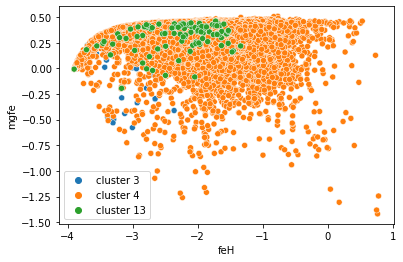

In [40]:
sns.scatterplot(data=df_small_small.iloc[chosen_ids], x='feH', y='mgfe', hue=hues)

In [55]:
df_small_small.loc[df_small_small['cluster_id']==42]

Unnamed: 0       feH  id_stars  radial_distance_stars  redshift_stars  \
139948      139948 -1.837030   1211093               6.733328            1.25   
139955      139955 -1.267967   1559912              14.129144            1.25   
139974      139974 -2.116419   2039006              14.426775            1.25   
139977      139977 -1.371637   2051060               3.968427            1.25   
139988      139988 -1.184096   2556650               6.598693            1.25   
140022      140022 -1.840144   3495009              12.152544            1.25   
140027      140027 -1.305689   3732019               9.367037            1.25   
140055      140055 -1.777162   4593996              13.319683            1.25   
140061      140061 -1.478231   4629815               3.238835            1.25   
140069      140069 -1.252701   4796389               1.632607            1.25   
140088      140088 -1.271695   5273813              14.197794            1.25   
140122      140122 -1.420064   6290502              11.236903            1.25   
140153      140153 -1.138517   7115888              12.112799            1.25   
140165      140165 -2.054924   7424536              14.258571            1.25   
140239      140239 -1.445716   9669366              15.565644            1.25   
140269      140269 -1.256098  10448627              10.889963            1.25   
140293      140293 -1.363161  11105462               3.913885            1.25   
140303      140303 -1.055710  11407140               7.456067            1.25   
140311      140311 -1.876298  11512860               6.685615            1.25   
140315      140315 -1.466947  11564549              10.227793            1.25   
140345      140345 -1.771941  12253556               8.042495            1.25   
140366      140366 -1.246730  12794669              11.506906            1.25   
140374      140374 -1.387538  12989777              14.908584            1.25   
140386      140386 -1.027612  13467084               7.319172            1.25   
140400      140400 -2.461376  13715355              12.273555            1.25   
140406      140406 -1.307528  13732568               9.779969            1.25   

        snap_list_stars    star_mass  subhalo_mass_stars  subhalo_peak_mass  \
139948              242  5053.433379        4.201140e+10       4.200855e+10   
139955              242  5077.803983        4.201140e+10       4.200855e+10   
139974              242  4393.912065        4.201140e+10       4.200855e+10   
139977              242  5089.874302        4.201140e+10       4.200855e+10   
139988              242  5358.516543        4.201140e+10       4.200855e+10   
140022              242  5061.756244        4.201140e+10       4.200855e+10   
140027              242  5088.292080        4.201140e+10       4.200855e+10   
140055              242  5102.411434        4.201140e+10       4.200855e+10   
140061              242  4634.284017        4.201140e+10       4.200855e+10   
140069              242  4792.213173        4.201140e+10       4.200855e+10   
140088              242  4755.659292        4.201140e+10       4.200855e+10   
140122              242  4679.291940        4.201140e+10       4.200855e+10   
140153              242  4485.761961        4.201140e+10       4.200855e+10   
140165              242  4958.470051        4.201140e+10       4.200855e+10   
140239              242  4812.166265        4.201140e+10       4.200855e+10   
140269              242  4639.842850        4.201140e+10       4.200855e+10   
140293              242  4412.038395        4.201140e+10       4.200855e+10   
140303              242  5004.497835        4.201140e+10       4.200855e+10   
140311              242  5024.405583        4.201140e+10       4.200855e+10   
140315              242  4837.892771        4.201140e+10       4.200855e+10   
140345              242  5327.010147        4.201140e+10       4.200855e+10   
140366              242  5134.232008        4.201140e+10       4.200855e+10   
140

In [67]:
df_small_small.to_hdf('../data/m12f_cluster_data_large_cluster_v2.h5', key='star')

In [2]:
df_small_small = pd.read_hdf('../data/m12i_cluster_data_large_cluster_v2.h5', key='star')

FileNotFoundError: File ../data/m12i_cluster_data_large_cluster_v2.h5 does not exist

In [48]:
remove_cluster = []
cutoff = 10000
for id in range(1, 27):
    if len(df_small_small.loc[df_small_small['cluster_id']==id]) < cutoff:
        remove_cluster.append(id)

print(remove_cluster)

df_small_small_small = df_small_small.loc[~df_small_small['cluster_id'].isin(remove_cluster)].copy()
print(26 - len(remove_cluster))

[1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 24, 26]
4


134098
134098


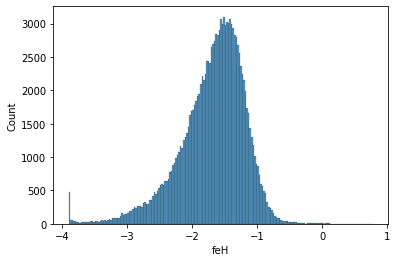

In [49]:
df = df_small_small_small
sns.histplot(df['feH'])
print(len(df))
print(len(df))
df['cluster_id_name']=df['cluster_id_name'] = np.array([f'cluster {id}' for id in df['cluster_id'].to_numpy()])
df = df.iloc[np.random.choice(len(df), min(len(df), 3000))].copy()

<AxesSubplot:xlabel='feH', ylabel='mgfe'>

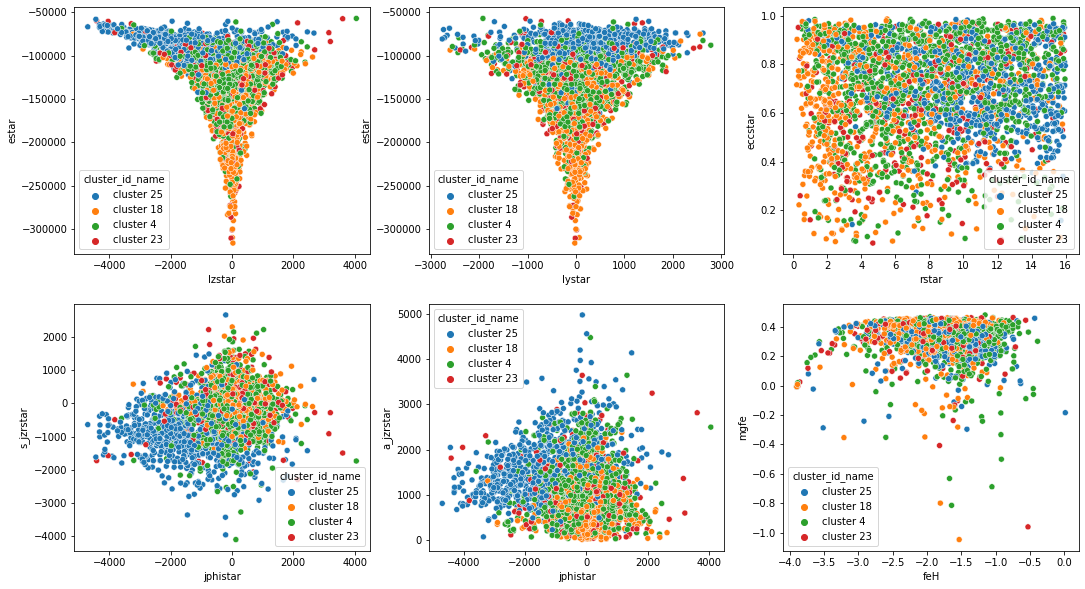

In [50]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
df['lstar'] = np.linalg.norm([df['lzstar'].to_numpy(),df['lystar'].to_numpy(),df['lxstar'].to_numpy()],axis=0)
df['c_lzstar'] = df['lzstar'].to_numpy()*np.abs(df['estar'].to_numpy())**2.3
df['c_lystar'] = df['lystar'].to_numpy()*np.abs(df['estar'].to_numpy())**2.3
df['c_lxstar'] = df['lxstar'].to_numpy()*np.abs(df['estar'].to_numpy())**2.3
df['s_jzrstar'] = df['jzstar'].to_numpy() - df['jrstar'].to_numpy() # mostly spherical because you can try squaring it
df['a_jzrstar'] = df['jzstar'].to_numpy() + df['jrstar'].to_numpy() # mostly spherical because you can try squaring it
df['rstar'] = np.linalg.norm([df['xstar'].to_numpy(),df['ystar'].to_numpy(),df['zstar'].to_numpy()],axis=0)
sns.scatterplot(data=df, ax=axes[0,0], x='lzstar', y='estar', hue='cluster_id_name')
sns.scatterplot(data=df, ax=axes[0,1], x='lystar', y='estar', hue='cluster_id_name')
sns.scatterplot(data=df, ax=axes[0,2], x='rstar', y='eccstar', hue='cluster_id_name')
sns.scatterplot(data=df, ax=axes[1,0], x='jphistar', y='s_jzrstar', hue='cluster_id_name')
sns.scatterplot(data=df, ax=axes[1,1], x='jphistar', y='a_jzrstar', hue='cluster_id_name')
sns.scatterplot(data=df, ax=axes[1,2], x='feH', y='mgfe', hue='cluster_id_name')

<AxesSubplot:xlabel='feH', ylabel='mgfe'>

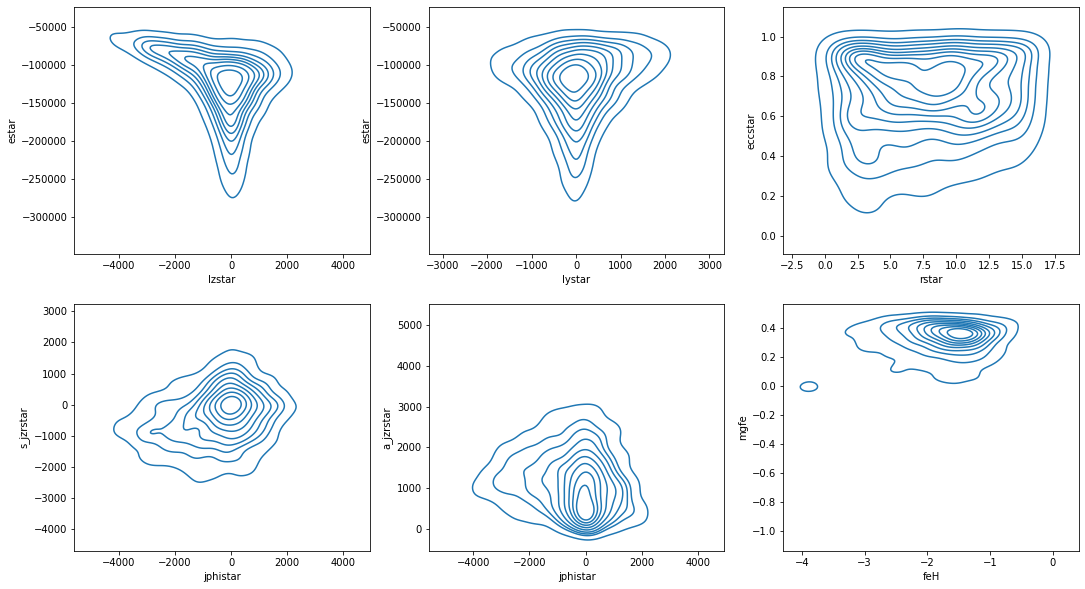

In [51]:
df.drop(columns=['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1'])
df.index.is_unique
df = df.reset_index()
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.kdeplot(data=df, ax=axes[0,0], x='lzstar', y='estar')
sns.kdeplot(data=df, ax=axes[0,1], x='lystar', y='estar')
sns.kdeplot(data=df, ax=axes[0,2], x='rstar', y='eccstar')
sns.kdeplot(data=df, ax=axes[1,0], x='jphistar', y='s_jzrstar')
sns.kdeplot(data=df, ax=axes[1,1], x='jphistar', y='a_jzrstar')
sns.kdeplot(data=df, ax=axes[1,2], x='feH', y='mgfe')

In [404]:
cluster1 = C_HDBSCAN(metric='euclidean', min_cluster_size=10, min_samples=10, cluster_selection_method='leaf', cluster_selection_epsilon=0)
cluster1.config()
selected_columns=['estar', 'lzstar', 'lxstar', 'lystar', 's_jzrstar', 'a_jzrstar', 'jphistar', 'eccstar', 'rstar', 'feH', 'mgfe', 'zmaxstar']

In [405]:
cluster1.add_data(df, columns=selected_columns)
labels = cluster1.fit()

In [406]:
eval_IoU1 = ClusterEvalIoU(labels, df['cluster_id'].to_numpy())
print(eval_IoU1())
print(eval_IoU1.TP)
print(eval_IoU1.T)
print(eval_IoU1.P)

(0.0, 0.0)
0
4
2


<AxesSubplot:xlabel='feH', ylabel='mgfe'>

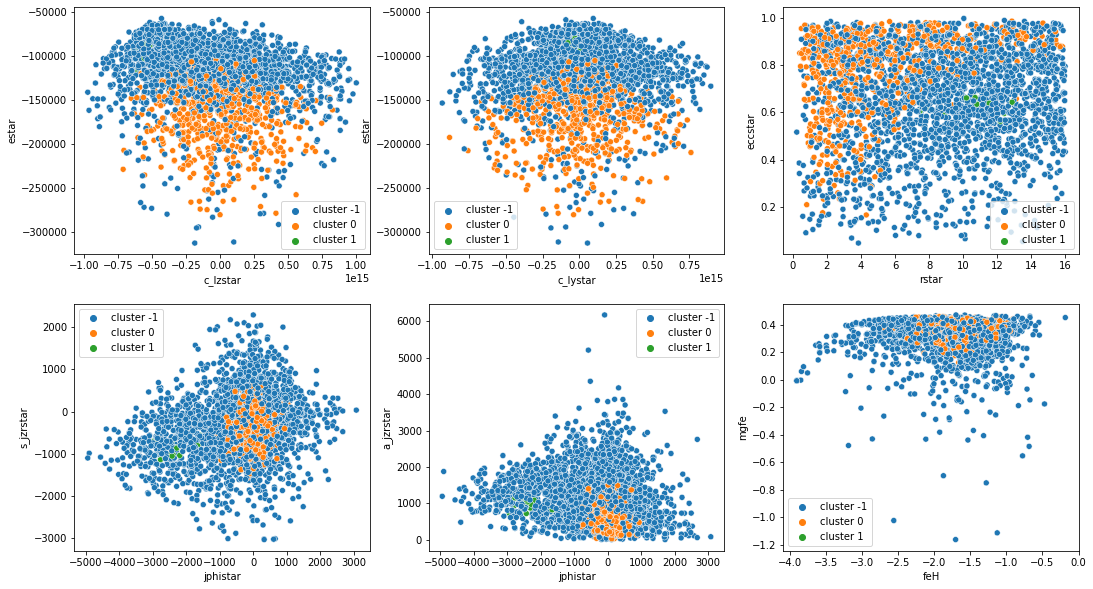

In [407]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
label_names = np.array([f'cluster {id}' for id in labels])
sns.scatterplot(data=df, ax=axes[0,0], x='c_lzstar', y='estar', hue=label_names)
sns.scatterplot(data=df, ax=axes[0,1], x='c_lystar', y='estar', hue=label_names)
sns.scatterplot(data=df, ax=axes[0,2], x='rstar', y='eccstar', hue=label_names)
sns.scatterplot(data=df, ax=axes[1,0], x='jphistar', y='s_jzrstar', hue=label_names)
sns.scatterplot(data=df, ax=axes[1,1], x='jphistar', y='a_jzrstar', hue=label_names)
sns.scatterplot(data=df, ax=axes[1,2], x='feH', y='mgfe', hue=label_names)

In [408]:
cluster2 = C_GaussianMixture(n_components=4)
cluster2.add_data(df, columns=selected_columns)
labels2 = cluster2.fit(epoch = 100)
eval_IoU2 = ClusterEvalIoU(labels2, df['cluster_id'].to_numpy())
print(eval_IoU2())
print(eval_IoU2.TP)
print(eval_IoU2.T)
print(eval_IoU2.P)

(0.25, 0.25)
1
4
4


<AxesSubplot:xlabel='feH', ylabel='mgfe'>

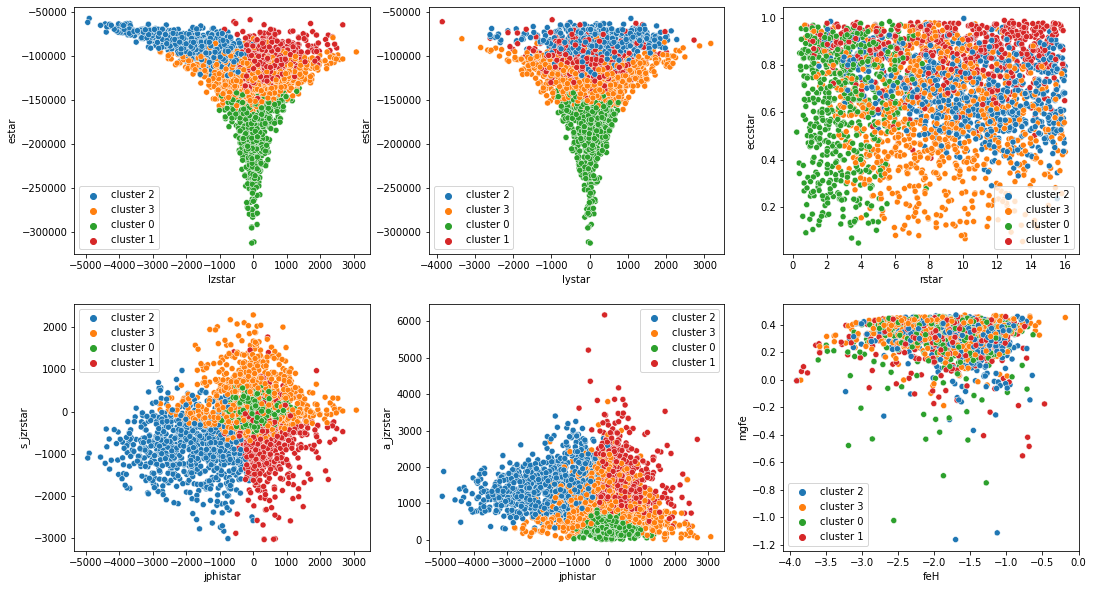

In [409]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
label_names = np.array([f'cluster {id}' for id in labels2])
sns.scatterplot(data=df, ax=axes[0,0], x='lzstar', y='estar', hue=label_names)
sns.scatterplot(data=df, ax=axes[0,1], x='lystar', y='estar', hue=label_names)
sns.scatterplot(data=df, ax=axes[0,2], x='rstar', y='eccstar', hue=label_names)
sns.scatterplot(data=df, ax=axes[1,0], x='jphistar', y='s_jzrstar', hue=label_names)
sns.scatterplot(data=df, ax=axes[1,1], x='jphistar', y='a_jzrstar', hue=label_names)
sns.scatterplot(data=df, ax=axes[1,2], x='feH', y='mgfe', hue=label_names)

In [104]:
df = df.iloc[np.random.choice(len(df), min(len(df), 10000))].copy()

In [106]:
import plotly.express as px

df['vstar'] = np.linalg.norm([df['vxstar'], df['vystar'], df['vzstar']], axis=0)
fig = px.scatter_3d(df, x=df['lxstar'], y=df['lystar'], z=df['lzstar'],
              color='class', size=np.abs(df['estar']), opacity=1, size_max=10)
fig.show()

In [574]:
df_select = df.loc[df['cluster_id']==25].copy()
fig = px.scatter_3d(df_select, x=(df_select['jzstar']-df_select['jrstar']), y=df_select['jphistar']*df_select['estar']**1, z=df_select['estar'],
              color='cluster_id_name', size=np.abs(df_select['estar']), opacity=1, size_max=10)
fig.show()

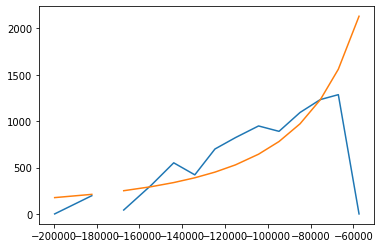

In [582]:
mean_e = []
std_lz = []
for start in range(-300*1000, 0, 10*1000):
    end = start + 10*1000
    df_s = df_select.loc[(df_select['estar']<end) & (df_select['estar']>start)]
    mean_e.append(np.mean(df_s['estar']))
    std_lz.append(np.std(df_s['lzstar']))
mean_e = np.array(mean_e)
std_lz = np.array(std_lz)
plt.plot(mean_e, std_lz)
plt.plot(mean_e, 1/np.abs(mean_e)**2*0.7*10000000000000)
plt.show()

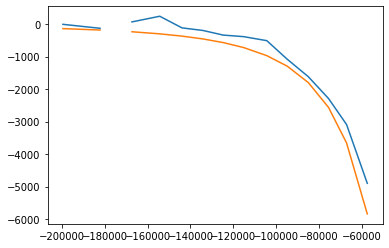

In [600]:
mean_e = []
mean_lz = []
for start in range(-300*1000, 0, 10*1000):
    end = start + 10*1000
    df_s = df_select.loc[(df_select['estar']<end) & (df_select['estar']>start)]
    mean_e.append(np.mean(df_s['estar']))
    mean_lz.append(np.mean(df_s['lzstar']))
mean_e = np.array(mean_e)
mean_lz = np.array(mean_lz)
plt.plot(mean_e, mean_lz)
plt.plot(mean_e, -1/np.abs(mean_e)**3*1.1*1000000000000000000)
plt.show()

In [ ]:
### sns.kdeplot(data=df.loc[df['cluster_id']==25], x='lzstar',color='blue')
sns.kdeplot(data=df.loc[df['cluster_id']==23], x='lzstar',color='green')
sns.kdeplot(data=df.loc[df['cluster_id']==18], x='lzstar',color='purple')
sns.kdeplot(data=df.loc[df['cluster_id']==4], x='lzstar',color='red')

<AxesSubplot:ylabel='Density'>

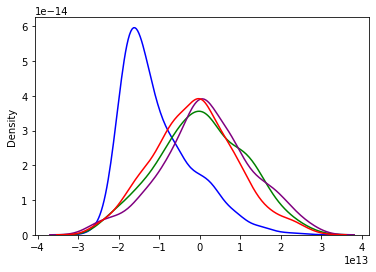

In [454]:
df_select = df.loc[df['cluster_id']==25].copy()
sns.kdeplot(data=df_select, x=df_select['lzstar']*(np.abs(df_select['estar'])**(8/4)),color='blue')
df_select = df.loc[df['cluster_id']==23].copy()
sns.kdeplot(data=df_select, x=df_select['lzstar']*(np.abs(df_select['estar'])**(8/4)),color='green')
df_select = df.loc[df['cluster_id']==18].copy()
sns.kdeplot(data=df_select, x=df_select['lzstar']*(np.abs(df_select['estar'])**(8/4)),color='purple')
df_select = df.loc[df['cluster_id']==4].copy()
sns.kdeplot(data=df_select, x=df_select['lzstar']*(np.abs(df_select['estar'])**(8/4)),color='red')

In [391]:
px.histogram(df, x=df['lzstar']*df['estar'], color='cluster_id_name')